In [13]:
#integrantes

#Bruno Osse Brigide - RA: 22.119.047-3

In [14]:
#imports
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [15]:
#Swing Up


#Variaveis de Entrada (Antecedent)
angle = ctrl.Antecedent(np.arange(30, 330, 1), 'angle')
speed = ctrl.Antecedent(np.arange(-10, 10, 0.1), 'speed')

#Variaveis de saída (Consequent)
vector = ctrl.Consequent(np.arange(-6, 6, 0.2), 'vector')


#Atribuição de categorias
angle['nls'] = fuzz.trimf(angle.universe, [90, 130, 170])
angle['nbs'] = fuzz.trimf(angle.universe, [30, 150, 170])
angle['saln'] = fuzz.trimf(angle.universe, [170, 175, 180])
angle['z'] = fuzz.trimf(angle.universe, [180, 180, 180])
angle['salp'] = fuzz.trimf(angle.universe, [180, 185, 190])
angle['pbs'] = fuzz.trimf(angle.universe, [190, 210, 330])
angle['pls'] = fuzz.trimf(angle.universe, [190, 230, 270])

speed['neg'] = fuzz.trapmf(speed.universe, [-10, -10, -1, 0])
speed['zs'] = fuzz.trapmf(speed.universe, [-0.1, 0, 0, 0.1])
speed['pos'] = fuzz.trapmf(speed.universe, [0, 1, 10, 10])


vector['nvvb'] = fuzz.trapmf(vector.universe, [-6, -6, -4.8, -3.6])
vector['nvb'] = fuzz.trimf(vector.universe, [-4.8, -3.6, -2.4])
vector['nb'] = fuzz.trimf(vector.universe, [-3.6, -2.4, -1.2])
vector['n'] = fuzz.trimf(vector.universe, [-2.4, -1.2, 0])
vector['z'] = fuzz.trimf(vector.universe, [-1.2, 0, 1.2])
vector['p'] = fuzz.trimf(vector.universe, [0, 1.2, 2.4])
vector['pb'] = fuzz.trimf(vector.universe, [1.2, 2.4, 3.6])
vector['pvb'] = fuzz.trimf(vector.universe, [2.4, 3.6, 4.8])
vector['pvvb'] = fuzz.trapmf(vector.universe, [3.6, 4.8, 6, 6])


C:\Users\b_bri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\b_bri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\b_bri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


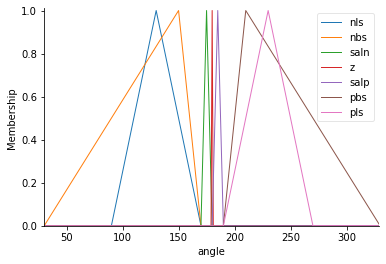

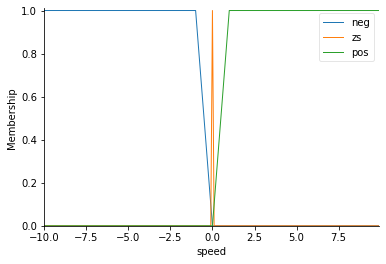

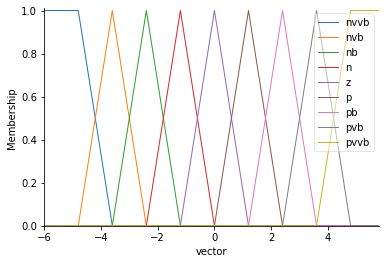

In [16]:
#visualização das variaveis
angle.view()
speed.view()
vector.view()

In [17]:
#regras

rule1 = ctrl.Rule(angle['nls'] & speed['pos'], vector['nb'])
rule2 = ctrl.Rule(angle['nbs'] & speed['pos'], vector['z'])
rule3 = ctrl.Rule(angle['saln'] & speed['pos'], vector['n'])
rule4 = ctrl.Rule(angle['z'] & speed['zs'], vector['p'])
rule5 = ctrl.Rule(angle['salp'] & speed['neg'], vector['p'])
rule6 = ctrl.Rule(angle['pbs'] & speed['neg'], vector['z'])
rule7 = ctrl.Rule(angle['pls'] & speed['neg'], vector['pb'])

controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [18]:
#Simulação
calculateVector = ctrl.ControlSystemSimulation(controller)

inputAngle = 50#int(input("angle (30, 330): "))
inputSpeed = 5#int(input("speed (-10, 10): "))

calculateVector.input['angle'] = inputAngle
calculateVector.input['speed'] = inputSpeed
calculateVector.compute()



Angle 50 
Speed 5.0 
Vector 0.0


C:\Users\b_bri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\b_bri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\b_bri\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


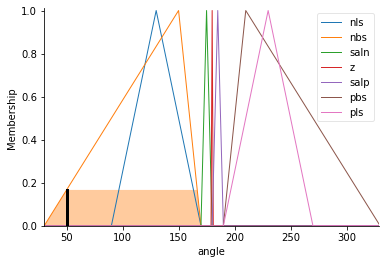

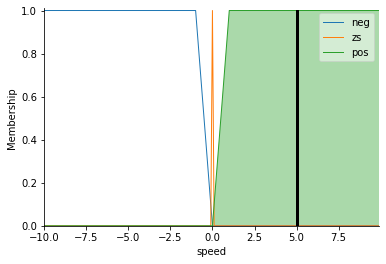

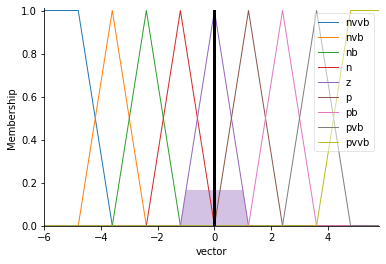

In [19]:
#output
vectorOutput = calculateVector.output['vector']

print("\nAngle %d \nSpeed %.1f \nVector %.1f" %(
        inputAngle,
        inputSpeed,
        vectorOutput))

angle.view(sim=calculateVector)
speed.view(sim=calculateVector)
vector.view(sim=calculateVector)

plt.show()